## IMPORTING LIBRARIES:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## DATASET LOADING

In [2]:
df_shopsy = pd.read_csv("shopsy_all_products.csv")

In [3]:
df_shopsy

,Product Name,Category,Price,Rating,No_of_Reviews
0,"KOTHOTYA Women Kurta, Pyjama & Dupatta Set",Women's Clothing,₹614,3.9,830
1,"BLACK PATTI Self Design Anarkali Kurta, Bottom...",Women's Clothing,₹587,3.8,694
2,MISS CLOTHING Women Embroidered Kurta,Women's Clothing,₹485,3.7,41
3,"TIGERSNAKE Solid, Plain Bollywood Lycra Blend ...",Women's Clothing,₹485,3.9,694
4,Bairaj Women Kurta and Pant Set,Women's Clothing,₹567,3.8,383
...,...,...,...,...,...
968,TULOSTA Large Extended Keyboard Shortcut key M...,Computer Accessories,₹151,4.2,307
969,Shivsoft 3D Optical wired USB Mouse in Black M...,Computer Accessories,₹98,4.0,96
970,Bestor USB Hub Multiport Adapter for MacBook P...,Computer Accessories,₹251,3.6,479
971,"R FASHION Laptop Tabletop Stand, Fold-Up, Adju...",Computer Accessories,₹198,4.0,30


## BASIC UNDERSTANDING OF DATASET

In [4]:
df_shopsy.shape

(973, 5)

In [5]:
df_shopsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   973 non-null    object 
 1   Category       973 non-null    object 
 2   Price          973 non-null    object 
 3   Rating         973 non-null    float64
 4   No_of_Reviews  973 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 38.1+ KB


In [6]:
df_shopsy.columns

Index(['Product Name', 'Category', 'Price', 'Rating', 'No_of_Reviews'], dtype='object')

In [7]:
df_shopsy['Category'].value_counts().to_frame(name = 'count').reset_index()

,Category,count
0,Beauty,102
1,Women's Clothing,75
2,Computer Accessories,71
3,Health & Fitness,67
4,Stationary,61
5,Mobile Accessories,61
6,Kitchen Appliances,57
7,Footwear,56
8,Women Accessories,53
9,Toys,50


In [8]:
df_shopsy.dtypes.to_frame()

,0
Product Name,object
Category,object
Price,object
Rating,float64
No_of_Reviews,int64


## DATA CLEANING

In [9]:
# Changing Data type
df_shopsy['Price'] = (
    df_shopsy['Price']
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
)

df_shopsy['Price'] = pd.to_numeric(df_shopsy['Price'], errors='coerce')

In [10]:
df_shopsy.head()

,Product Name,Category,Price,Rating,No_of_Reviews
0,"KOTHOTYA Women Kurta, Pyjama & Dupatta Set",Women's Clothing,614,3.9,830
1,"BLACK PATTI Self Design Anarkali Kurta, Bottom...",Women's Clothing,587,3.8,694
2,MISS CLOTHING Women Embroidered Kurta,Women's Clothing,485,3.7,41
3,"TIGERSNAKE Solid, Plain Bollywood Lycra Blend ...",Women's Clothing,485,3.9,694
4,Bairaj Women Kurta and Pant Set,Women's Clothing,567,3.8,383


In [11]:
df_shopsy.isnull().sum().to_frame(name = "Null Count")

,Null Count
Product Name,0
Category,0
Price,0
Rating,0
No_of_Reviews,0


In [12]:
# Cheking Duplicate Values
df_shopsy.duplicated().sum()

np.int64(0)

In [13]:
# text Casting
df_shopsy['Product Name'] = df_shopsy['Product Name'].str.title()
df_shopsy['Category'] = df_shopsy['Category'].str.lower()

In [14]:
df_shopsy.head()

,Product Name,Category,Price,Rating,No_of_Reviews
0,"Kothotya Women Kurta, Pyjama & Dupatta Set",women's clothing,614,3.9,830
1,"Black Patti Self Design Anarkali Kurta, Bottom...",women's clothing,587,3.8,694
2,Miss Clothing Women Embroidered Kurta,women's clothing,485,3.7,41
3,"Tigersnake Solid, Plain Bollywood Lycra Blend ...",women's clothing,485,3.9,694
4,Bairaj Women Kurta And Pant Set,women's clothing,567,3.8,383


## EDA

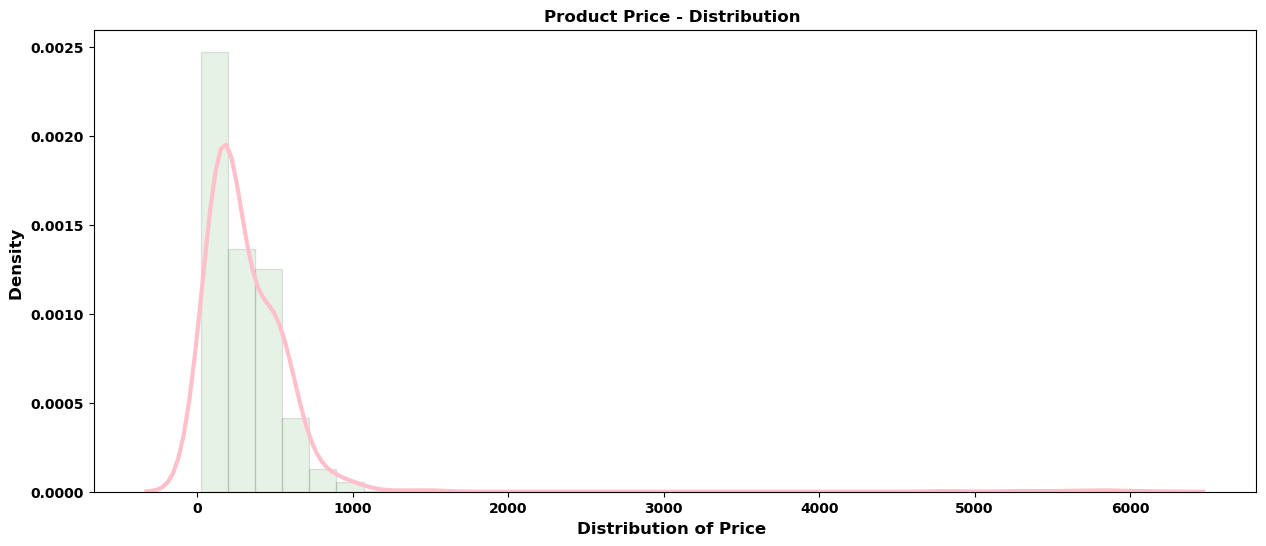

In [16]:
# Price Distribution
plt.figure(figsize = (15,6))
plt.hist(df_shopsy['Price'],density = True,bins = 35,alpha = 0.1,color = 'green',edgecolor = 'black')

sns.kdeplot(df_shopsy['Price'],color = 'pink',lw = 3)   #density plot

plt.xlabel('Distribution of Price ',fontsize = 12,fontweight = 'bold')
plt.ylabel('Density ',fontsize = 12,fontweight = 'bold')
plt.title('Product Price - Distribution ',fontsize = 12,fontweight = 'bold')
plt.xticks(fontweight = 'bold',color='black')
plt.yticks(fontweight = 'bold',color='black')

plt.show()

# Insights:
- Price distribution is right-skewed.
- Majority of products fall in the low to mid-price range.
- Few high-price outliers exist.


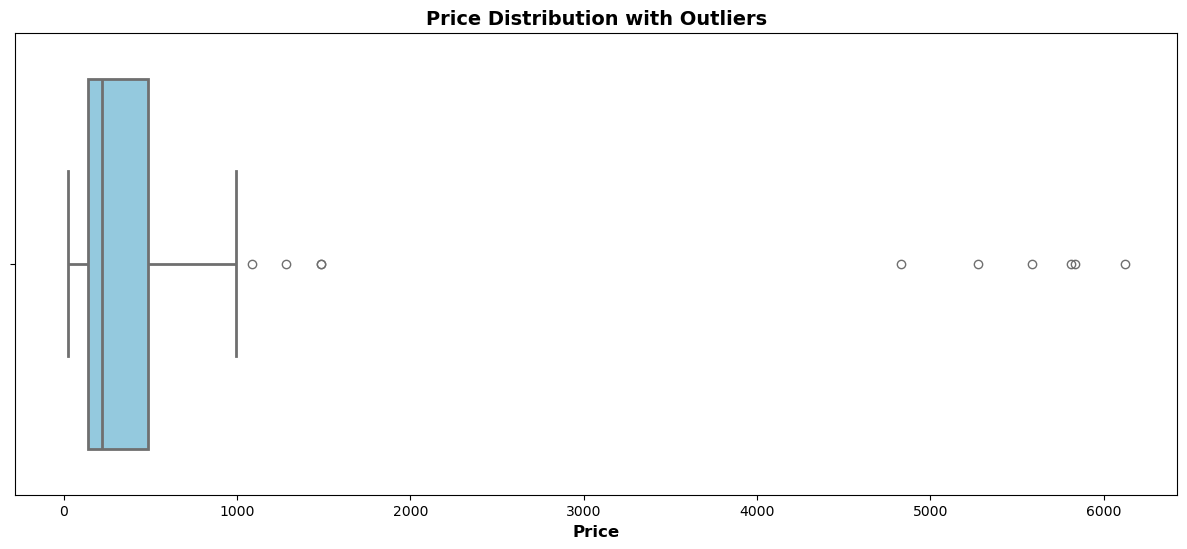

In [17]:
#Price Outliers Analysis:

plt.figure(figsize=(15, 6))

sns.boxplot(
    x=df_shopsy['Price'],
    color='skyblue',          
    linewidth=2,
    fliersize=6            
)

plt.title("Price Distribution with Outliers", fontsize=14, fontweight = 'bold')
plt.xlabel("Price", fontsize=12, fontweight = 'bold')

plt.show()

# Insights:
- Significant outliers exist above the upper whisker.
- These may represent premium or luxury products.
- Outliers increase variance and affect average price calculations.

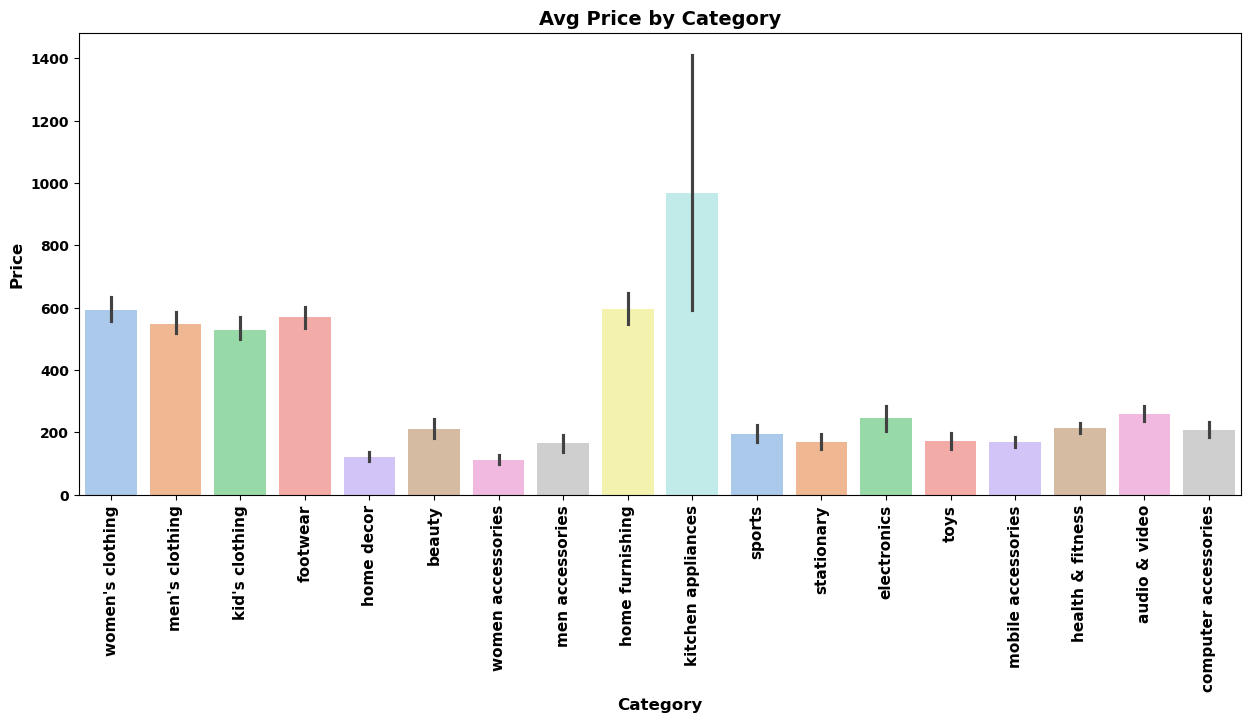

In [18]:
#Average Price by Category

plt.figure(figsize=(15,6))

sns.barplot(
    data=df_shopsy,
    x='Category',
    y='Price',
    palette = 'pastel'
)

plt.title('Avg Price by Category', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Price', fontsize=12, fontweight='bold')

plt.xticks(rotation=90, fontsize=11, fontweight='bold', color='black')
plt.yticks(fontweight='bold', color='black')
plt.show()

## Insights:
- Categories like kitchen appliances, home furnishing, and clothing have higher average prices.
- Accessories, stationery, and beauty categories are relatively low-priced.
- Large price variation exists within certain categories.

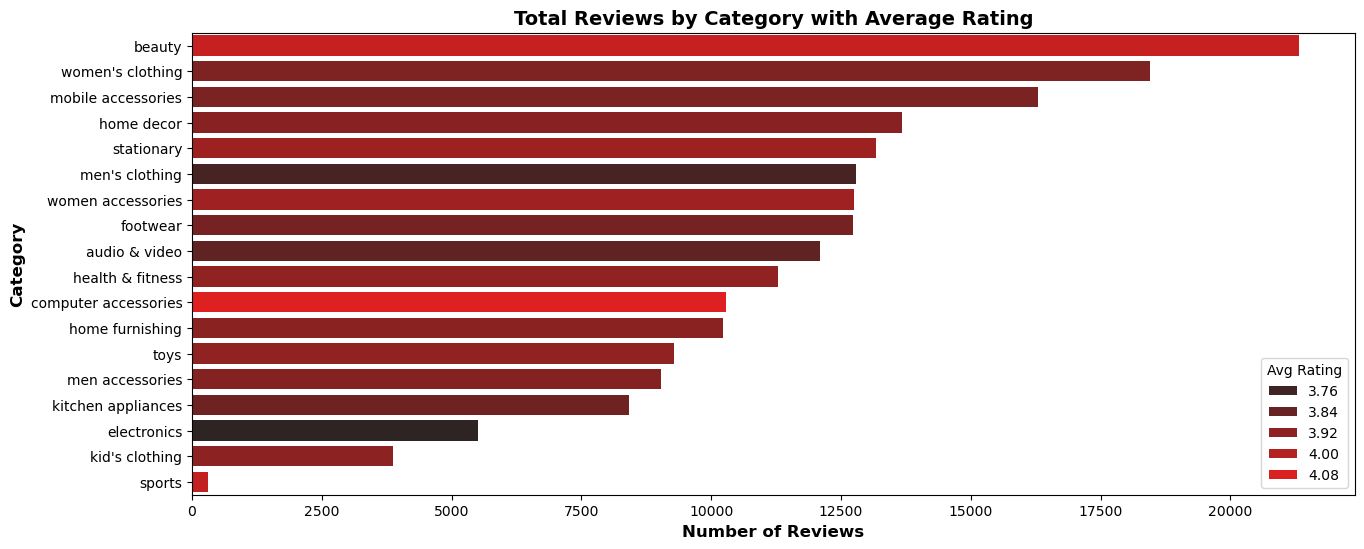

In [23]:
#Total review by Category with Average Rating:

# Prepare data
plot_data = df_shopsy.groupby('Category').agg({
    'No_of_Reviews': 'sum',
    'Rating': 'mean'
}).sort_values('No_of_Reviews', ascending = False)

plt.figure(figsize=(15,6))

sns.barplot(
    x='No_of_Reviews',
    y=plot_data.index,
    data=plot_data,
    color = 'red',           
    hue=plot_data['Rating'],     
    dodge=False
)

plt.title("Total Reviews by Category with Average Rating", fontsize=14, fontweight='bold')
plt.xlabel("Number of Reviews",fontsize=12, fontweight='bold')
plt.ylabel("Category",fontsize=12, fontweight='bold')
plt.legend(title="Avg Rating")
plt.show()

## Insights:
- Categories like toys, beauty, mobile accessories, and women accessories have the highest review counts.
- High review count indicates high customer engagement and popularity.
- Average ratings across categories are mostly between 3.7 and 4.1, showing generally positive feedback.

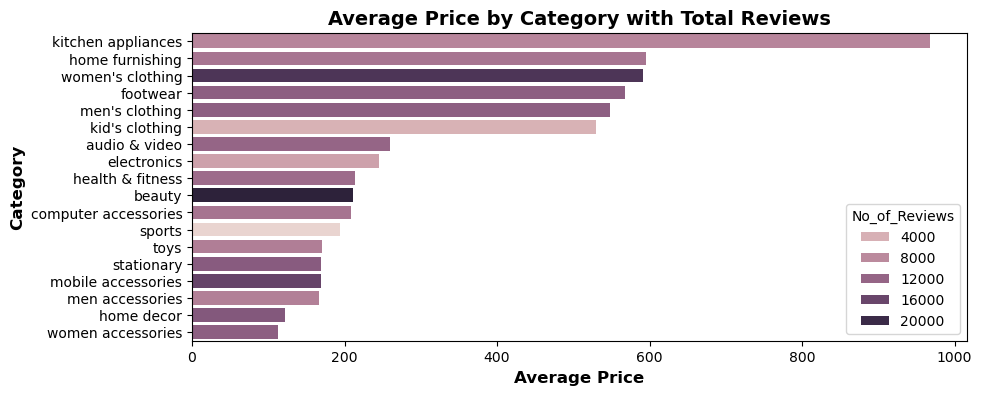

In [22]:
#Average price by Category with Total Reviews:

category_data = df_shopsy.groupby('Category').agg({'Price':'mean','No_of_Reviews':'sum'}).sort_values('Price', ascending = False)

plt.figure(figsize=(10,4))
sns.barplot(
    x='Price',
    y=category_data.index,
    data=category_data,
    hue=category_data['No_of_Reviews'], 
    dodge=False
)
plt.title("Average Price by Category with Total Reviews", fontsize=14, fontweight='bold')
plt.xlabel("Average Price", fontsize=12, fontweight='bold')
plt.ylabel("Category", fontsize=12, fontweight='bold')
plt.show()

## Insights:
- These categories have higher average prices and dark color intensity, indicating high total reviews.
- Customers are willing to spend more and actively review these products.

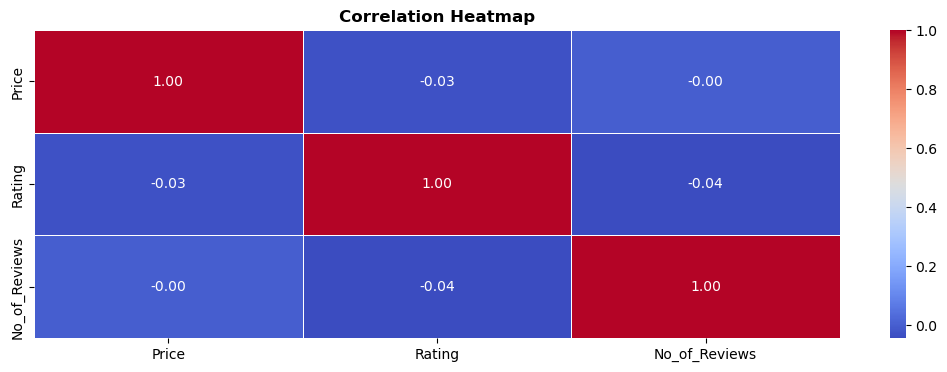

In [24]:
#Correlation Heatmap Analysis:

plt.figure(figsize=(13,4))
corr = df_shopsy.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontweight='bold')
plt.show()

## Insights:
- Most features show weak or negative correlation.
- No strong linear relationships.
- Indicates complex, non-linear behavior.

## DATA STORAGE

In [25]:
df_shopsy.to_csv("df_cleaned_shopsy.csv", index=False)

df_cleaned_shopsy = pd.read_csv("df_cleaned_shopsy.csv")
df_cleaned_shopsy.head()

,Product Name,Category,Price,Rating,No_of_Reviews
0,"Kothotya Women Kurta, Pyjama & Dupatta Set",women's clothing,614,3.9,830
1,"Black Patti Self Design Anarkali Kurta, Bottom...",women's clothing,587,3.8,694
2,Miss Clothing Women Embroidered Kurta,women's clothing,485,3.7,41
3,"Tigersnake Solid, Plain Bollywood Lycra Blend ...",women's clothing,485,3.9,694
4,Bairaj Women Kurta And Pant Set,women's clothing,567,3.8,383


In [29]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///shopsy_products.db')
df_cleaned_shopsy.to_sql('shopsy_products', engine, if_exists='replace', index=False)

973

In [30]:
df_check = pd.read_sql("SELECT * FROM shopsy_products LIMIT 5;", con=engine)
print(df_check)

                                        Product Name          Category  Price  \
0         Kothotya Women Kurta, Pyjama & Dupatta Set  women's clothing    614   
1  Black Patti Self Design Anarkali Kurta, Bottom...  women's clothing    587   
2              Miss Clothing Women Embroidered Kurta  women's clothing    485   
3  Tigersnake Solid, Plain Bollywood Lycra Blend ...  women's clothing    485   
4                    Bairaj Women Kurta And Pant Set  women's clothing    567   

   Rating  No_of_Reviews  
0     3.9            830  
1     3.8            694  
2     3.7             41  
3     3.9            694  
4     3.8            383  


In [31]:
query = "SELECT * FROM shopsy_products"
df = pd.read_sql(query,engine)

df.head()

,Product Name,Category,Price,Rating,No_of_Reviews
0,"Kothotya Women Kurta, Pyjama & Dupatta Set",women's clothing,614,3.9,830
1,"Black Patti Self Design Anarkali Kurta, Bottom...",women's clothing,587,3.8,694
2,Miss Clothing Women Embroidered Kurta,women's clothing,485,3.7,41
3,"Tigersnake Solid, Plain Bollywood Lycra Blend ...",women's clothing,485,3.9,694
4,Bairaj Women Kurta And Pant Set,women's clothing,567,3.8,383


In [32]:
df['Category'].unique()

array(["women's clothing", "men's clothing", "kid's clothing", 'footwear',
       'home decor', 'beauty', 'women accessories', 'men accessories',
       'home furnishing', 'kitchen appliances', 'sports', 'stationary',
       'electronics', 'toys', 'mobile accessories', 'health & fitness',
       'audio & video', 'computer accessories'], dtype=object)

## UNSUPERVISED LEARNING

## K-MEANS CLUSTERING

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [34]:
# Feature Selection
X = df[['Price', 'Rating', 'No_of_Reviews']]

#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

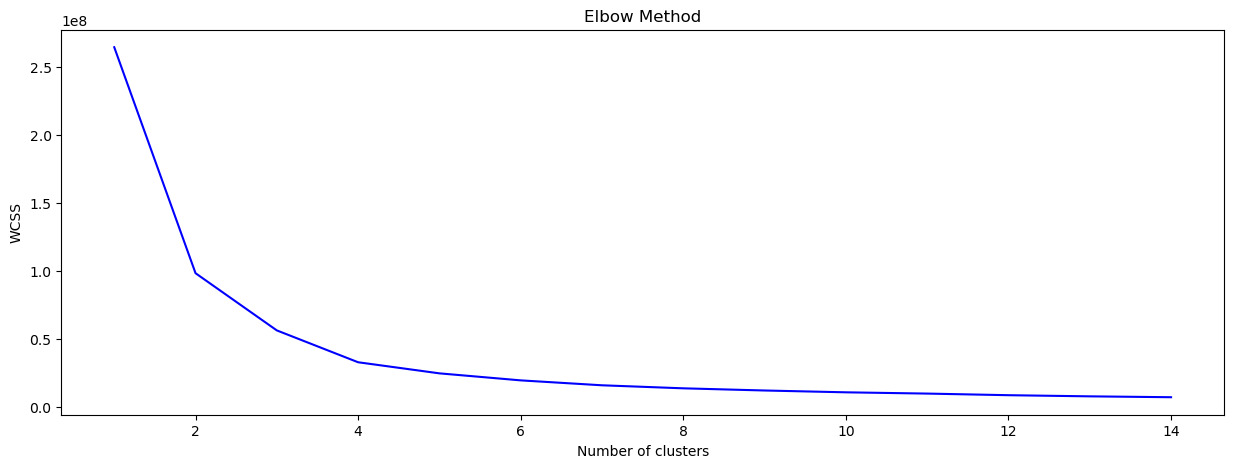

In [35]:
# Elbow method

wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(15,5))
plt.plot(range(1, 15), wcss,color='Blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [36]:
#Implement with k = 3 Clusters

kmeans = KMeans(n_clusters=3, 
                init='k-means++', 
                max_iter=300, 
                n_init=10, 
                random_state=0)

pred_y = kmeans.fit_predict(X_scaled)
pred_y

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [37]:
df['Cluster'] = pred_y
df['Cluster'] = df['Cluster'] + 1 

In [38]:
df.head()

,Product Name,Category,Price,Rating,No_of_Reviews,Cluster
0,"Kothotya Women Kurta, Pyjama & Dupatta Set",women's clothing,614,3.9,830,2
1,"Black Patti Self Design Anarkali Kurta, Bottom...",women's clothing,587,3.8,694,2
2,Miss Clothing Women Embroidered Kurta,women's clothing,485,3.7,41,1
3,"Tigersnake Solid, Plain Bollywood Lycra Blend ...",women's clothing,485,3.9,694,2
4,Bairaj Women Kurta And Pant Set,women's clothing,567,3.8,383,2


In [39]:
df.groupby('Cluster')[['Price', 'Rating', 'No_of_Reviews']].mean()

,Price,Rating,No_of_Reviews
Cluster,,,
1,296.386179,3.924932,91.215447
2,306.746725,3.898690,581.371179
3,5575.500000,3.950000,177.000000


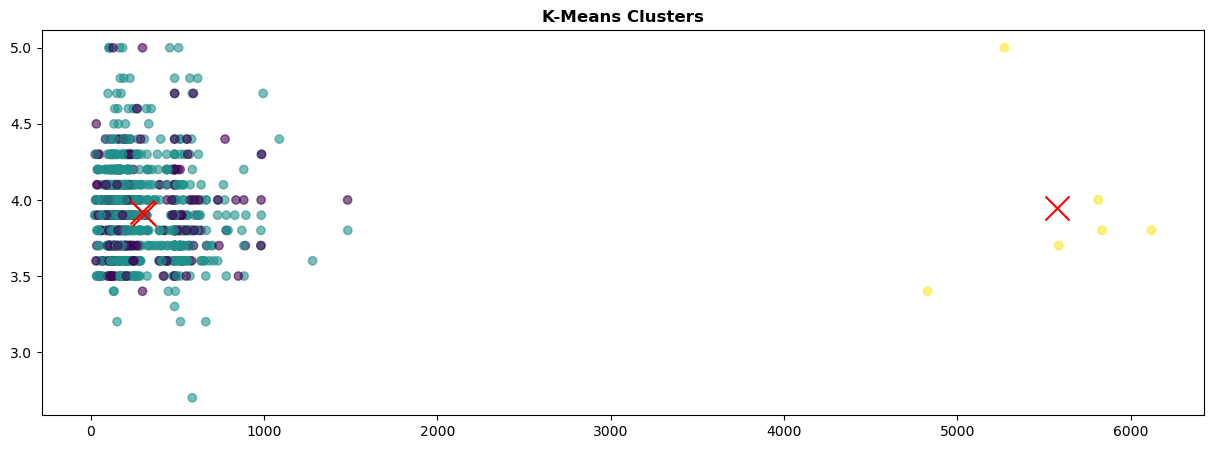

In [40]:
labels = kmeans.fit_predict(X)

plt.figure(figsize=(15,5))
plt.scatter(X.values[:, 0], X.values[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='red',
    marker = 'x'
)

plt.title("K-Means Clusters",fontweight = 'bold')
plt.show()

In [41]:
# Save to MySQL
df.to_sql(
    name='croma_products_clustered',
    con=engine,
    if_exists='replace',
    index=False
)

973

## SUPERVISED LEARNING

In [42]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [43]:
X = df[['Product Name', 'Price', 'Rating', 'No_of_Reviews']]
y = df['Category']

In [44]:
le = LabelEncoder()
y = le.fit_transform(y)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            stop_words='english'
        ), 'Product Name'),

        ('num', StandardScaler(), ['Price', 'Rating', 'No_of_Reviews'])
    ]
)

In [47]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(
        objective='multi:softmax',
        num_class=len(set(y)),
        eval_metric='mlogloss',
        random_state=42
    )
}

In [49]:
results = []

for name, model in models.items():
    pipeline = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.943590   0.947734  0.943590  0.944270
1                  SVM  0.810256   0.833391  0.810256  0.810999
2        Decision Tree  0.882051   0.892382  0.882051  0.879559
3        Random Forest  0.974359   0.976112  0.974359  0.973982
4              XGBoost  0.907692   0.918860  0.907692  0.908841


## Insights:
##### Random Forest gives 92% ,Logistic Regression gives 92% and XGBoost gives 86% were selected for hyperparameter tuning due to their superior performance and potential for further accuracy improvement.

## HYPERPARAMETER TUNING

In [50]:
# Features & Target
X = df[['Product Name', 'Price', 'Rating', 'No_of_Reviews']]
y = df['Category']

# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split (ONLY ONCE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 2),
            stop_words='english'
        ), 'Product Name'),
        ('num', StandardScaler(), ['Price', 'Rating', 'No_of_Reviews'])
    ]
)

## RANDOM FOREST

In [51]:
rf_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    ))
])


rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}


rf_grid = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

print("\nRANDOM FOREST (BALANCED + TUNED)")
print("Best Params:", rf_grid.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_rf, average='weighted'))


RANDOM FOREST (BALANCED + TUNED)
Best Params: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Accuracy : 0.9743589743589743
Precision: 0.976111513904156
Recall   : 0.9743589743589743
F1 Score : 0.9739821485703839


## LOGISTIC REGRESSION

In [52]:
lr_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        n_jobs=-1
    ))
])

lr_param_grid = {
    'model__C': [0.01, 0.1, 1, 10]
}

lr_grid = GridSearchCV(
    lr_pipeline,
    lr_param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1
)

lr_grid.fit(X_train, y_train)

lr_best = lr_grid.best_estimator_
y_pred_lr = lr_best.predict(X_test)

print("\nLOGISTIC REGRESSION (BALANCED + TUNED)")
print("Best Params:", lr_grid.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_lr, average='weighted'))


LOGISTIC REGRESSION (BALANCED + TUNED)
Best Params: {'model__C': 10}
Accuracy : 0.9743589743589743
Precision: 0.9763734982965753
Recall   : 0.9743589743589743
F1 Score : 0.9743235615433757


## XGBOOOSTING

In [ ]:
import numpy as np
xgb_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        num_class=len(np.unique(y)),
        tree_method='hist',   
        random_state=42,
        n_jobs=-1
    ))
])


xgb_param_dist = {
    'model__n_estimators': [100, 150],
    'model__max_depth': [4, 6],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    xgb_pipeline,
    xgb_param_dist,
    n_iter=10,               
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    random_state=42
)
xgb_random.fit(X_train, y_train)

xgb_best = xgb_random.best_estimator_

y_pred_xgb = xgb_best.predict(X_test)

print("\nXGBOOST FINAL RESULTS")
print("Best Params:", xgb_random.best_params_)
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_xgb, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_xgb, average='weighted'))